Invoke-WebRequest -Uri "https://www.scss.tcd.ie/Doug.Leith/CSU44061/week4.php" -OutFile "week4_1.csv"

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.dummy import DummyClassifier
import matplotlib.ticker as mtick

week4_1.csv # id:2-2-2-1 

In [14]:
data = np.loadtxt('week4_1.csv', delimiter=',')
X = data[:, :2]
Y = data[:, 2]
X1 = data[data[:, 2] == 1]
X2 = data[data[:, 2] == -1]
# split dataset to train set and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=77)
print(X.shape, Y.shape)

(3045, 2) (3045,)


Question 1(a)

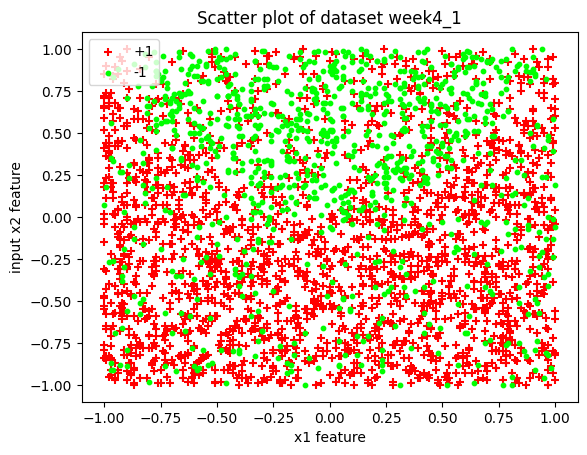

In [29]:
fig, ax = plt.subplots()
ax.scatter(X1[:, 0], X1[:, 1], marker='+', color='#FF0000', label='+1')  # Bright Red
ax.scatter(X2[:, 0], X2[:, 1], marker='o', color='#00FF00', s=10, label='-1')  # Bright Green
ax.set_xlabel('x1 feature')
ax.set_ylabel('input x2 feature')
ax.legend(loc='best')
plt.title("Scatter plot of dataset week4_1")
plt.show()

x1 and x2 are the two different input features, different colours were used to distinguish the difference:the green pldotus sign being -1 points, and the red dot sign being +1 points.

It can be seen from the firesultgure that the distribution of the data is a mess and it is difficult to demarcate its boundaries

After employing the `train_test_split` function to partition the dataset into a training set and a test set, we proceed to preprocess the training set data. Specifically, we feed the training set into the `PolynomialFeatures` function, which allows us to generate polynomial features by altering the original features through various degrees and configurations.

Subsequently, we apply the `LogisticRegression` function to this augmented training data while experimenting with different parameter values and polynomial degrees. This step helps us fine-tune the logistic regression model for the best performance.

To ensure that our model does not suffer from overfitting, we utilize the `cross_val_score` function. This function enables us to implement cross-validation, which involves dividing the training set data into multiple distinct subsets (folds). The model is then trained and validated multiple times, with each fold taking turns as the validation set. This process helps us evaluate the model's generalization performance and identify any issues related to overfitting, thus ensuring that our model performs well on unseen data.

Best accuracy: 0.78 (C=10, Degree=10)


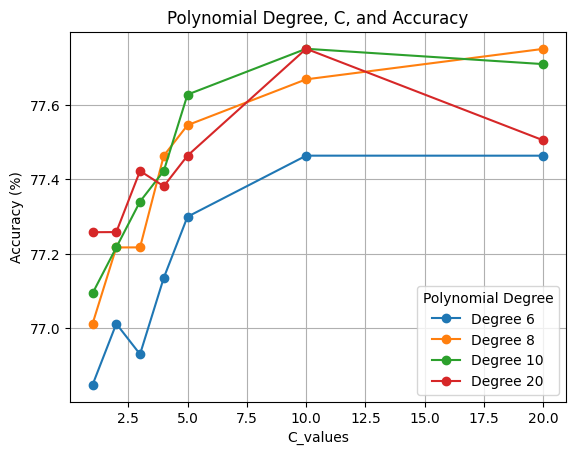

In [35]:
def logi_tune_params(c_list, degree_list, x, y, cv=5):
    colors = ['#06d6a0', '#118ab2', '#ffd166', '#ef476f']
    best_acc = 0
    best_c = 0
    best_degree = 0

    for degree in degree_list:
        x_poly = PolynomialFeatures(degree).fit_transform(x)
        accuracy = []

        for c in c_list:
            model = LogisticRegression(penalty='l2', C=c, solver='lbfgs', max_iter=1000)
            train_score = cross_val_score(model, x_poly, y, cv=cv, scoring='accuracy')

            curr_score = train_score.mean()
            accuracy.append(curr_score * 100)

            if curr_score > best_acc:
                best_acc = curr_score
                best_c = c
                best_degree = degree

        plt.plot(c_list, accuracy, label=f'Degree {degree}', marker='o')

    print(f"Best accuracy: {best_acc:.2f} (C={best_c}, Degree={best_degree})")

    plt.xlabel('C_values')
    plt.ylabel('Accuracy (%)')
    plt.legend(title='Polynomial Degree')
    plt.title("Polynomial Degree, C, and Accuracy")
    plt.grid(True)
    plt.show()

C_range = [1, 2, 3, 4, 5, 10, 20]
degree_range = [6, 8, 10, 20]
logi_tune_params(C_range, degree_range, x_train, y_train)


As can be seen from the result, when the C_value is 10 and the degree is 10, the accuracy of the model reaches the maximum value of 0.78. At this time, the value of C has almost no effect on the result of the accuracy.

Question i(b)